In [1]:
import numpy as np
import pandas as pd
import os

base_dir = 'C:/Users/kyujin/Documents/Python Scripts/'
ex_file = 'insta_crawling1.xlsx'

ex_dir = os.path.join(base_dir, ex_file)

df = pd.read_excel(ex_dir, header=None, dtype={'user_id': str, 'key_url':str, 'init_time':str,'like':np.int64, 'view':np.int64,'hashtag':str},
                     fill_na=0)
df.columns = ['user_id', 'key_url', 'init_time', 'like', 'view', 'hashtag']
df.head()

,user_id,key_url,init_time,like,view,hashtag
0,lee___yujini,https://www.instagram.com/p/B_hRM0tJIPr/,2020-04-28T09:39:19.000Z,2.0,NaN,NaN
1,chul2gram,https://www.instagram.com/p/B_hPb4vAbrl/,2020-04-28T09:23:54.000Z,11.0,NaN,NaN
2,j876my,https://www.instagram.com/p/B_hJiDyjHYQ/,2020-04-28T08:32:18.000Z,649.0,NaN,NaN
3,seolhwa939,https://www.instagram.com/p/B_hIJVRB04U/,2020-04-28T08:20:12.000Z,320.0,NaN,NaN
4,nothing__a11,https://www.instagram.com/p/B_g95PwJaiF/,2020-04-28T06:50:37.000Z,964.0,NaN,NaN


In [2]:
# NaN -> 0으로 변환
df.fillna(0, inplace=True)
# 좋아요 수가 있는 게시글만 사용 (동영상 제거)
df = df[df.like != 0]

In [3]:
# 사용자 리스트 추출 / 수집 계정 수 확인
user_list = list(df['user_id'].unique())
len(user_list)

66

In [10]:
for user in user_list:
    print(len(df[df['user_id'] == user]))

33
35
33
33
35
32
35
28
34
35
34
35
32
34
29
35
34
31
35
35
35
23
33
21
25
34
33
30
33
23
35
33
34
35
35
35
35
30
33
23
32
35
35
22
35
34
33
35
35
28
10
34
33
23
32
11
7
35
35
31
32
32
31
34
22
31


In [11]:
# 디스커버리 해시태그 포함 : mkt 컬럼 1(true)로 표기
mask = df.iloc[:, 5].str.contains('디스커버리', na=False, regex=True)
df['mkt'] = 0
df.loc[mask,'mkt'] = 1

In [12]:
# 시간 -> 일자단위로 변환
df['init_time'] = df['init_time'].apply(lambda x: x.split('T')[0])

In [13]:
# user group 나눠보기 (1~3 tier)
# user id의 평균 좋아요 개수 구하기
user_like_mean = df['like'].groupby(df['user_id']).mean()
user_like_mean = pd.DataFrame(user_like_mean)

In [14]:
user_like_mean = user_like_mean.sort_values(['like'], ascending=[False])
user_like_mean['tier'] = pd.qcut(user_like_mean['like'], 3, labels=['3','2','1'])

In [15]:
user_tier_dict = user_like_mean['tier'].to_dict()
df['tier'] = df['user_id'].apply(lambda x: user_tier_dict[x])
# map을 써도 됨!
# df['tier'] = df['user_id'].map(user_tier_dict)

In [33]:
df[df['mkt']==1]

,user_id,key_url,init_time,like,view,hashtag,mkt,tier
177,hyehwa_elin,https://www.instagram.com/p/B_QqPFklask/,2020-04-21,2019.0,0.0,캠핑#디스커버리#레깅스#디스커버리버킷디워커v2에어#discoveryexpeditio...,1,1
274,minsuu_,https://www.instagram.com/p/B_HYEZnDpvi/,2020-04-18,1098.0,0.0,디스커버리익스페디션#디스커버러#디스커버리운동화#버킷디워커v2에어#ad,1,2
309,minsuu_,https://www.instagram.com/p/B_C-YFvjlgd/,2020-04-16,1047.0,0.0,디스커버리익스페디션#디스커버러#디스커버리레깅스#플렉스레깅스#여행레깅스#레깅스코디#디...,1,2
691,msensation,https://www.instagram.com/p/B-CSNKBhBmb/,2020-03-22,839.0,0.0,디스커버리바람막이#이노블럭#혹쉬,1,3
926,k.suxx,https://www.instagram.com/p/B-eZocrF5f2/,2020-04-02,279.0,0.0,디스커버리익스페디션#디스커버러#후드티#후드집업,1,3
984,park_sang_jeong,https://www.instagram.com/p/B_PBG_Pp3_t/,2020-04-21,1408.0,0.0,디스커버리익스페디션#디스커버러#디스커버리레깅스#플렉스레깅스#여행레깅스#레깅스코디#디...,1,2
1223,xon_ah,https://www.instagram.com/p/B_cKEdOnZyy/,2020-04-26,224.0,0.0,디스커버리익스페디션#디스커버러#디스커버리레깅스#플렉스레깅스#여행레깅스#레깅스코디#디...,1,3
1242,jpak_dosa,https://www.instagram.com/p/B9AoI04JbMg/,2020-02-26,218.0,0.0,디스커버리#디스커버리익스페디션#캠페인촬영#브랜드촬영#사진촬영#패션화보#패션촬영#스튜...,1,2
1340,jjj_sso,https://www.instagram.com/p/B_EXNirj0_k/,2020-04-17,170.0,0.0,디스커버리익스페디션#키높이운동화#디스커버러#디스커버리운동화#조거플렉스#어글리슈즈#운...,1,3
1488,mee.z1,https://www.instagram.com/p/B8nxsuuH--E/,2020-02-16,578.0,0.0,디스커버리익스페디션#디스커버리#디스커버리운동화#버킷디워커v2#커플아이템#커플신발#ad,1,2


In [25]:
# 시각화 1) 박스플롯

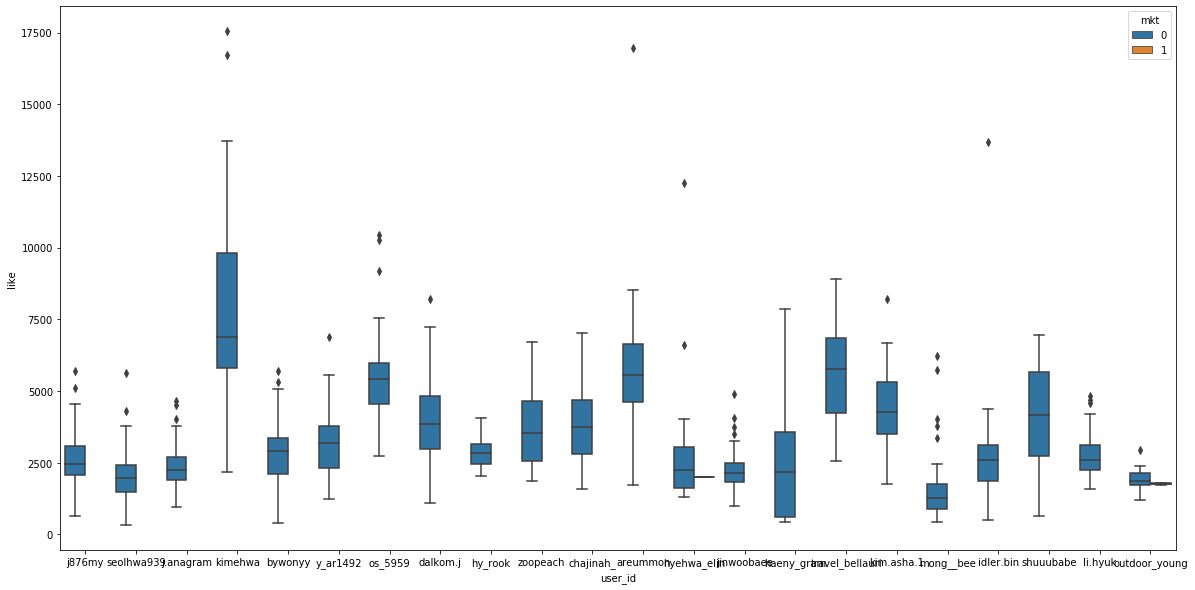

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_1 = df[df.tier=='1']

plt.figure(figsize=(20,10))
sns.boxplot(x=df_1['user_id'], y=df_1['like'], hue=df_1['mkt'], data=df_1)

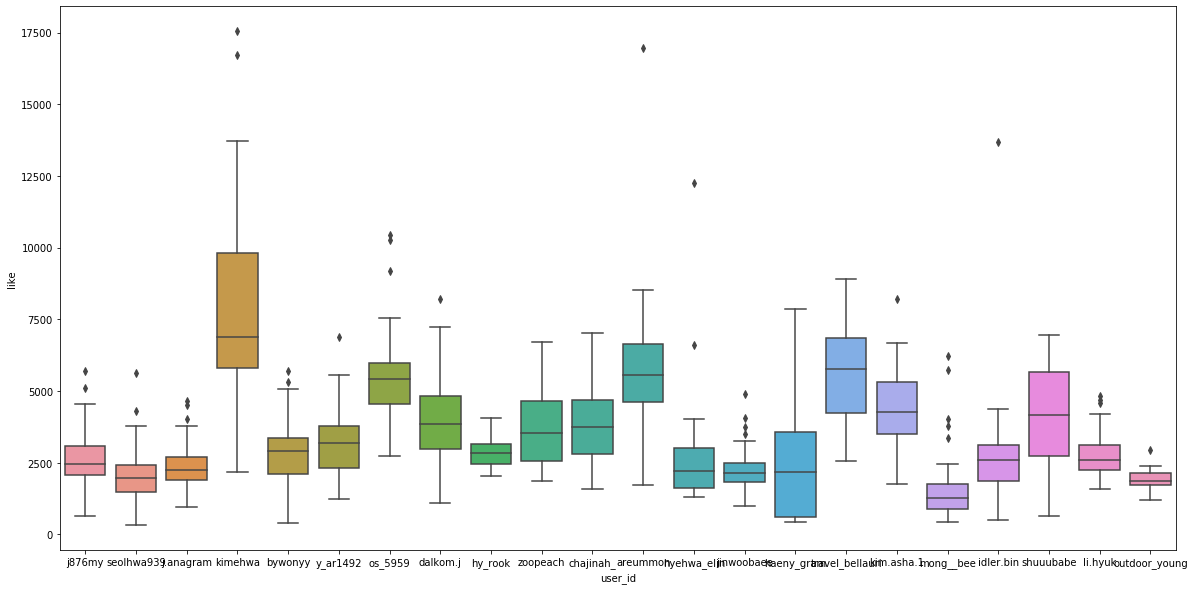

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df_1['user_id'], y=df_1['like'], data=df_1)

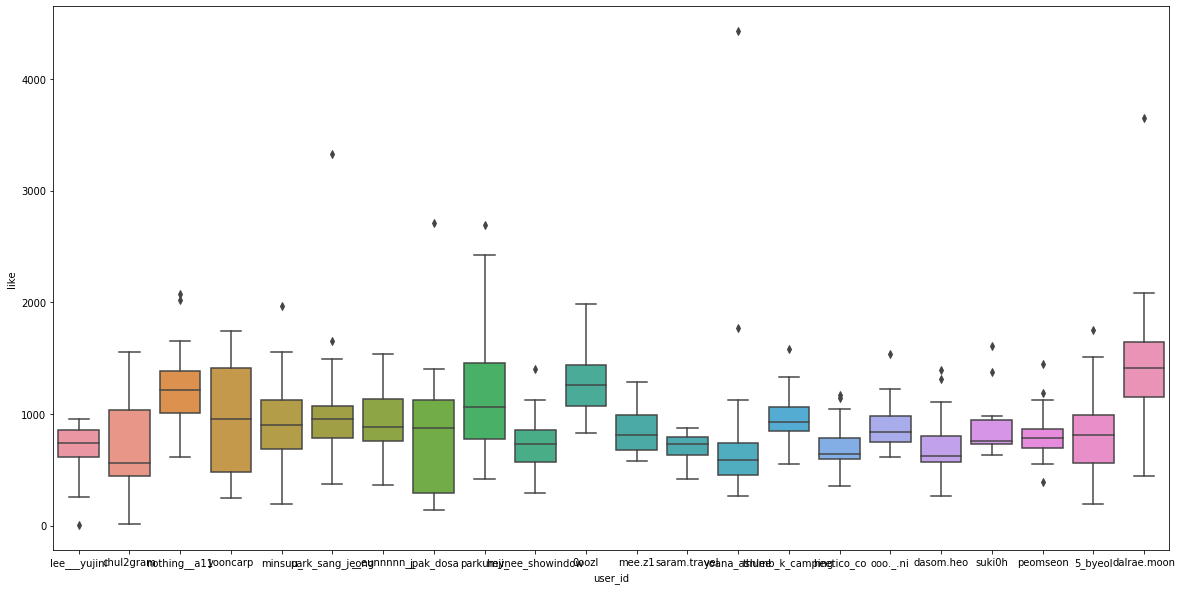

In [18]:
df_2 = df[df.tier=='2']

plt.figure(figsize=(20,10))
sns.boxplot(x=df_2['user_id'], y=df_2['like'], data=df_2) #, hue=df_2['mkt']

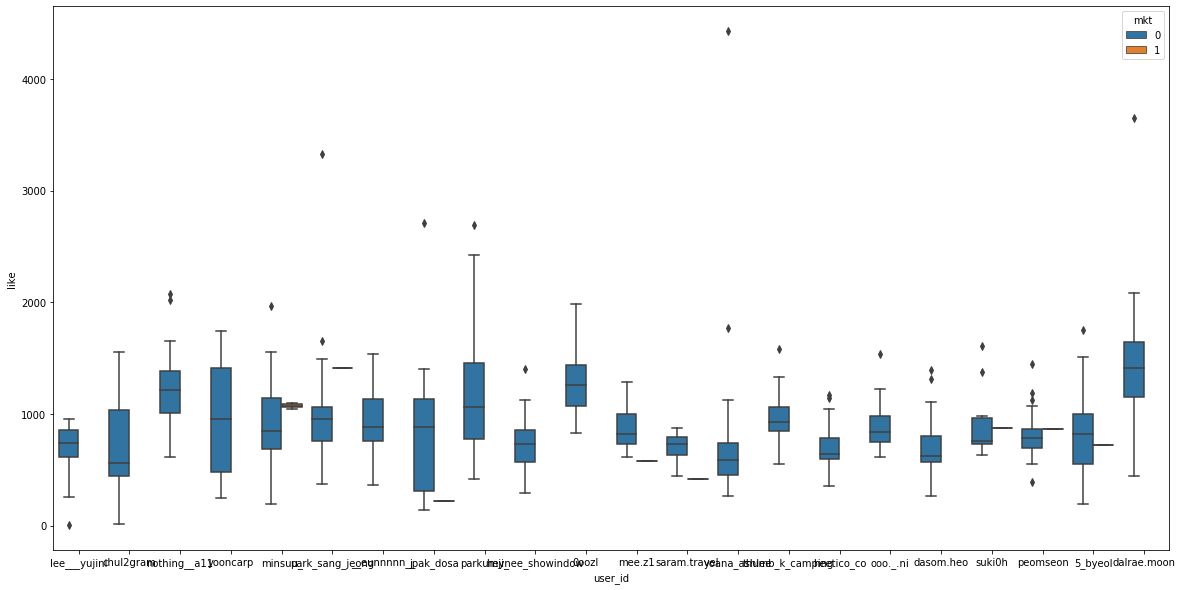

In [32]:
df_3 = df[df.tier=='2']

plt.figure(figsize=(20,10))
sns.boxplot(x=df_3['user_id'], y=df_3['like'], hue=df_3['mkt'], data=df_3)

In [33]:
ad_id = df[df.mkt==1]['user_id'].unique().tolist()

In [53]:
ad_id

['leesocoool',
 'chul2gram',
 'peomseon',
 '2na_g',
 'travel_bellauri',
 'minsuu_',
 'k.suxx']

In [44]:
df['selected'] = df['user_id'].apply(lambda x :1 if x in ad_id else 0)

In [45]:
df

,user_id,key_url,init_time,like,view,hashtag,mkt,tier,selected
0,5_byeol,https://www.instagram.com/p/B7n7VyvHnQW/,2020-01-22,935.0,0.0,0,0,2,0
1,5_byeol,https://www.instagram.com/p/B4ZqItdAo6R/,2019-11-03,1139.0,0.0,0,0,2,0
2,5_byeol,https://www.instagram.com/p/B8DG_aQHGyF/,2020-02-02,1148.0,0.0,0,0,2,0
3,5_byeol,https://www.instagram.com/p/B7s_wSsHakl/,2020-01-24,824.0,0.0,0,0,2,0
4,5_byeol,https://www.instagram.com/p/B7stBb3nHIV/,2020-01-24,415.0,0.0,0,0,2,0
...,...,...,...,...,...,...,...,...,...
1183,ooone_d,https://www.instagram.com/p/B-WhYpcg6sc/,2020-03-30,160.0,0.0,0,0,3,0
1184,ooone_d,https://www.instagram.com/p/B-9MGfqgiu5/,2020-04-14,169.0,0.0,0,0,3,0
1185,ooone_d,https://www.instagram.com/p/B-KDkjEAun7/,2020-03-25,133.0,0.0,0,0,3,0
1186,ooone_d,https://www.instagram.com/p/B9jB2Qqnhrw/,2020-03-10,189.0,0.0,0,0,3,0


In [47]:
df_sel = df[df['selected'] == 1]

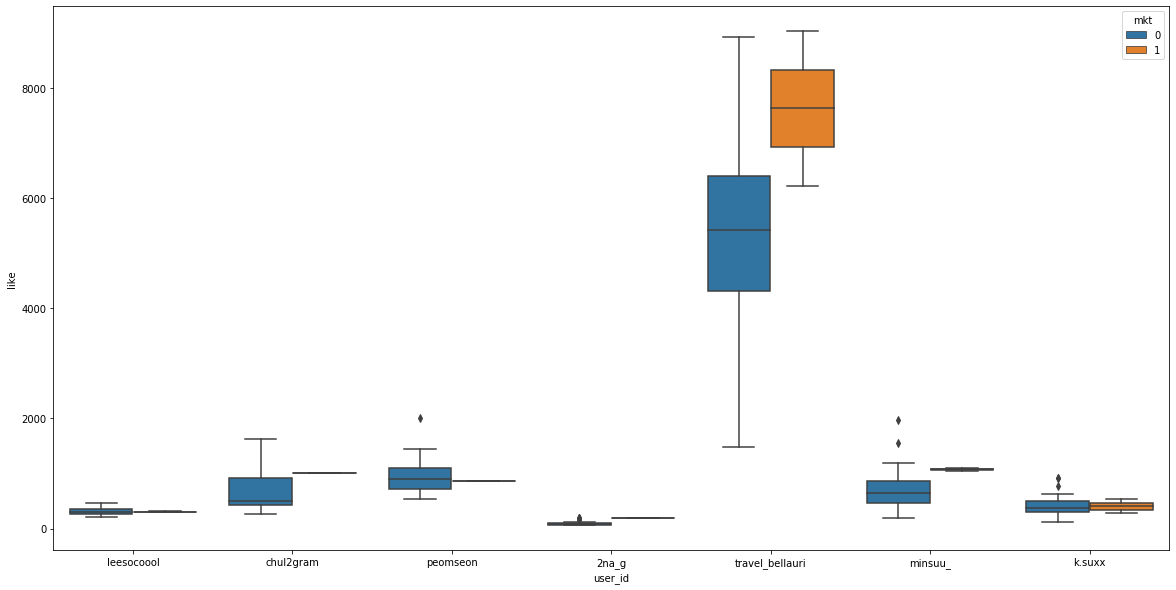

In [48]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df_sel['user_id'], y=df_sel['like'], hue=df_sel['mkt'], data=df_sel)

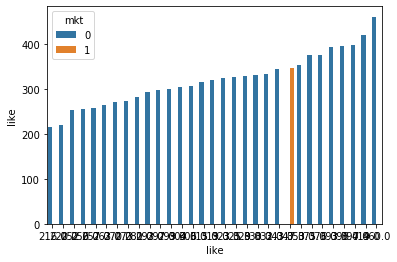

In [20]:
df_sample = df[df.user_id == 'leesocoool']
sns.barplot(x="like", y="like", hue="mkt", data=df_sample)

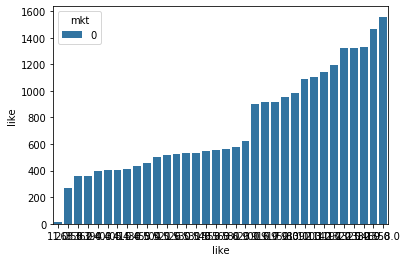

In [22]:
df_sample = df[df.user_id == 'chul2gram']
sns.barplot(x="like", y="like", hue="mkt", data=df_sample)

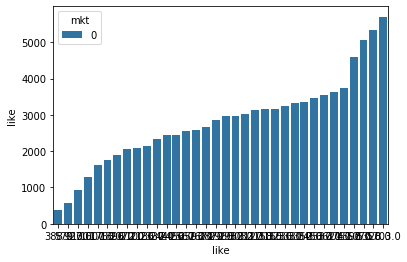

In [49]:
df_sample = df[df.user_id == 'bywonyy']
sns.barplot(x="like", y="like", hue="mkt", data=df_sample)

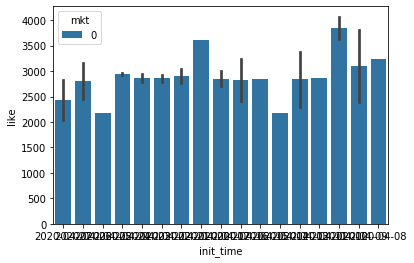

In [37]:
df_sample = df[df.user_id == 'hy_rook']
sns.barplot(x="init_time", y="like", hue="mkt", data=df_sample)

In [85]:
df[df.user_id=='peomseon']
print(df['init_time'].min(), df['init_time'].max())

2019-10-09 2020-04-26


In [93]:
# 이용자별로 최근날짜를 뽑아보려면...?
# 문제발견. 최근 순이 아님. 걍 랜덤으로 끌고오네 이유를 모르겠네....하
time_group = df['init_time'].groupby(df['user_id'])
time_max = time_group.max()
time_min = time_group.min()

In [101]:
df[df['user_id']=='5_byeol']['init_time']

0     2020-01-22
1     2019-11-03
2     2020-02-02
3     2020-01-24
4     2020-01-24
5     2020-02-06
6     2020-01-28
7     2020-01-23
8     2019-12-29
9     2019-11-03
11    2020-01-21
12    2020-01-01
13    2019-10-27
14    2019-12-15
15    2019-11-23
16    2019-11-26
17    2020-01-30
18    2019-11-17
19    2019-11-21
20    2019-12-01
21    2020-02-07
22    2019-11-06
23    2020-01-26
25    2019-11-04
26    2019-10-12
27    2019-10-20
30    2019-12-21
31    2020-01-25
32    2019-10-09
Name: init_time, dtype: object

In [95]:
time_max

user_id
2na_g              2020-03-29
5_byeol            2020-02-07
bywonyy            2020-04-01
chajinah_          2020-04-23
chul2gram          2020-04-15
dalrae.moon        2020-04-20
dan_16_            2020-04-08
dasom.heo          2020-04-10
hael_kk            2020-04-25
haeny_gram         2020-04-08
heetico_co         2020-04-22
hy_rook            2020-04-17
j.anagram          2020-04-26
j876my             2020-04-20
jina_e             2020-04-04
jyong2             2020-04-06
k.suxx             2020-04-16
keemdm             2020-02-25
khsolvly           2020-04-26
kim.asha.1         2020-04-12
kimehwa            2020-04-20
leesocoool         2020-03-31
minsuu_            2020-04-20
mong__bee          2020-04-26
nothing__a11       2020-04-18
ooo._.ni           2020-04-26
ooone_d            2020-04-23
outdoor_young      2020-04-20
park_sang_jeong    2020-04-01
peomseon           2020-04-08
raw_j              2020-04-22
rueun              2020-04-23
seolhwa939         2020-04-26
tr

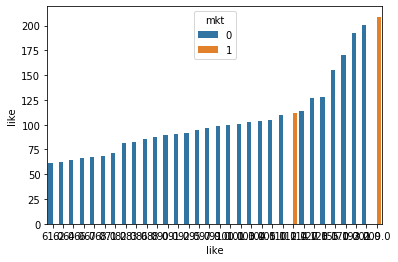

In [25]:
df_sample = df[df.user_id == '2na_g']
sns.barplot(x="like", y="like", hue="mkt", data=df_sample)

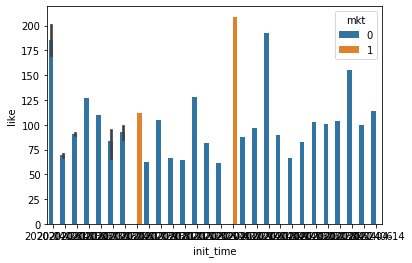

In [26]:
df_sample = df[df.user_id == '2na_g']
sns.barplot(x="init_time", y="like", hue="mkt", data=df_sample)

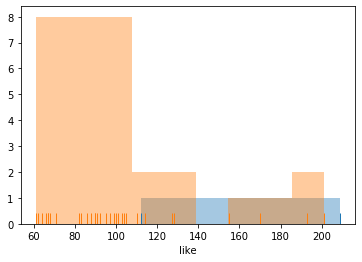

In [50]:
df_sample = df[df.user_id == '2na_g']
x = df_sample[df_sample.mkt == 1]['like']
y = df_sample[df_sample.mkt == 0]['like']
sns.distplot(x, hist=True, kde=False, rug=True)
sns.distplot(y, hist=True, kde=False, rug=True)

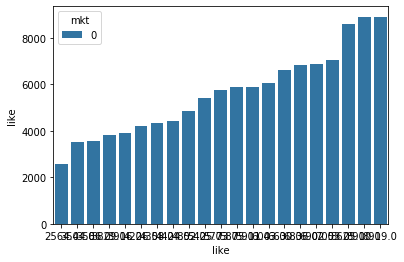

In [51]:
df_sample = df[df.user_id == 'travel_bellauri']
sns.barplot(x="like", y="like", hue="mkt", data=df_sample)

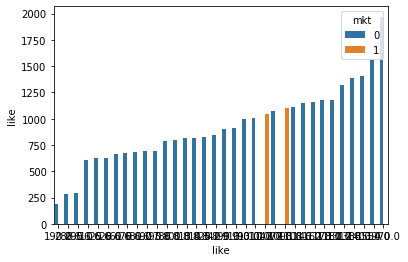

In [52]:
df_sample = df[df.user_id == 'minsuu_']
sns.barplot(x="like", y="like", hue="mkt", data=df_sample)

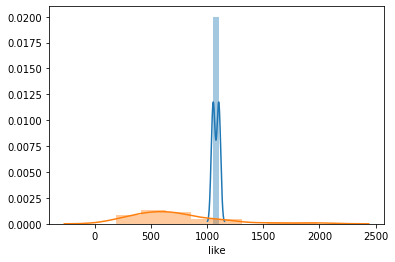

In [60]:
df_sample
x = df_sample[df_sample.mkt == 1]['like']
y = df_sample[df_sample.mkt == 0]['like']
sns.distplot(x)
sns.distplot(y)

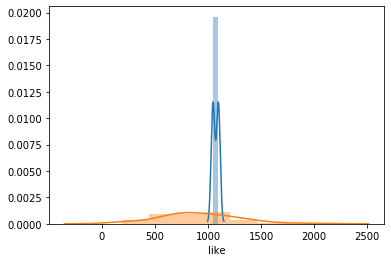

In [74]:
df_sample = df[df.user_id == 'minsuu_']
x = df_sample[df_sample.mkt == 1]['like']
y = df_sample[df_sample.mkt == 0]['like']
sns.distplot(x)
sns.distplot(y)

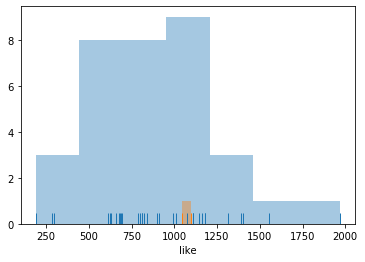

In [75]:
sns.distplot(y, hist=True, kde=False, rug=True)
sns.distplot(x, hist=True, kde=False, rug=True)

594    5909.0
595    4915.0
596    7775.0
597    8920.0
599    5429.0
602    4855.0
603    4424.0
605    1476.0
606    5721.0
607    3586.0
611    2425.0
612    5666.0
614    4358.0
615    5774.0
620    6905.0
621    4271.0
622    3544.0
623    7055.0
626    8628.0
Name: like, dtype: float64

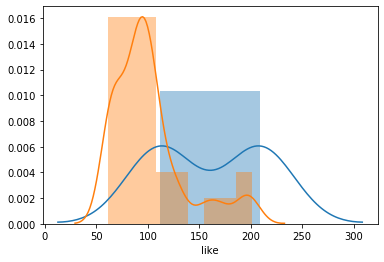

In [72]:
df_sample = df[df.user_id == '2na_g']
x = df_sample[df_sample.mkt == 1]['like']
y = df_sample[df_sample.mkt == 0]['like']
sns.distplot(x)
sns.distplot(y)
